# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
Simple linear regression is a statistical method used to model the relationship between a dependent variable and a single independent variable. It involves fitting a line to the data that best describes the relationship between the two variables, so that predictions of the dependent variable can be made based on the value of the independent variable.
- What type of machine learning is linear regression?
Linear regression is a type of supervised learning, a branch of machine learning that involves training a model on a labeled dataset to make predictions on unseen data.
- What is a “line of best fit” using the OLS method?
The line of best fit using the OLS (Ordinary Least Squares) method refers to the line that best describes the relationship between the dependent and independent variables in a linear regression model. It is obtained by minimizing the sum of the squared differences between the observed and predicted values of the dependent variable.
- What is the difference between correlation and regression?
Correlation refers to the relationship between two variables and the extent to which they change together, whereas regression is a method for modeling the relationship between two variables and making predictions about one variable based on the other. In other words, correlation measures the strength of the relationship between two variables, while regression models the relationship and allows us to make predictions
- Describe a scenario when you would use linear regression and why you would use it. 
Linear regression can be used in a scenario where the relationship between a dependent variable and one or more independent variables is linear. For example, if you wanted to model the relationship between a person's height and their weight, you could use linear regression to fit a line to the data that best describes the relationship between height and weight. This can help you make predictions about a person's weight based on their height, which can be useful for health assessments, for example.

### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

Linearity refers to a relationship between an independent variable and a dependent variable in which the change in the dependent variable is proportional to the change in the independent variable.

Normality refers to the assumption that the distribution of a variable is normal or Gaussian, meaning that its values are symmetrically distributed around the mean with a bell-shaped curve.

Homoscedasticity refers to the assumption that the variance of a variable is constant and does not depend on the value of the independent variable.

No multicollinearity refers to the assumption that the independent variables in a model are not highly correlated with each other, meaning that the presence of one independent variable does not explain a large amount of the variance in another independent variable.

No endogeneity refers to the assumption that the independent variables in a model are not influenced by the dependent variable, meaning that the relationship between the independent and dependent variables is not causal.

No autocorrelation refers to the assumption that there is no relationship between the errors or residuals of a model and their lagged values.

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

Coefficient of Constant / Intercept (b0): In a linear regression model, the coefficient of constant, also known as the intercept, is the expected mean value of the dependent variable when the independent variable is equal to zero. It represents the point at which the line of best fit intersects the vertical axis.

Coefficient of Independent Variable (B1): In a simple linear regression model with one independent variable, the coefficient of the independent variable represents the change in the dependent variable that is expected to occur for a one-unit change in the independent variable. It represents the slope of the line of best fit and provides information about the strength and direction of the relationship between the two variables.

Standard Error: The standard error is a measure of the variability of the estimated coefficient in a linear regression model. It is used to quantify the precision of the coefficient estimate and provides information about the reliability of the regression results.

T-Statistic: The T-statistic is used to test the hypothesis that a coefficient in a linear regression model is equal to zero. The T-statistic is calculated as the ratio of the estimated coefficient to its standard error and follows a T-distribution.

P-Value of T-Statistic (from the independent variable): The P-value of the T-statistic is a measure of the significance of the independent variable in the linear regression model. It represents the probability of observing a T-statistic as extreme as the one calculated, assuming the null hypothesis (that the coefficient is equal to zero) is true. If the P-value is less than a certain level (e.g. 0.05), it indicates that the independent variable is significantly associated with the dependent variable and provides evidence for including it in the model.


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

R-squared: R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of variation in the dependent variable that is explained by the independent variables in a linear regression model. It ranges from 0 to 1, with a higher R-squared value indicating a stronger relationship between the dependent and independent variables and a better fit of the model to the data.

Adjusted R-squared: The adjusted R-squared is an adjusted version of the R-squared that accounts for the number of independent variables in the model. The adjusted R-squared adjusts the R-squared by penalizing the addition of independent variables that do not improve the fit of the model. This helps to avoid overfitting and provides a more accurate assessment of the goodness of fit of the model. The adjusted R-squared ranges from 0 to 1, with a higher value indicating a better fit of the model to the data, taking into account the number of independent variables.

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [17]:
# make necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

# 
%matplotlib inline

sns.set()

In [18]:
# load data
df = pd.read_csv('house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20451,2997800021,2015-02-19,475000.0,3,2.50,1310,1294.0,2.0,0,1,3,8.0,1180.0,130,2008.0,98116.0,47.5773,-122.409,1330
20452,263000018,2014-05-21,360000.0,3,2.50,1530,1131.0,3.0,0,1,3,8.0,1530.0,0,2009.0,98103.0,47.6993,-122.346,1530
20453,6600060120,2015-02-23,400000.0,4,2.50,2310,5813.0,2.0,0,1,3,8.0,2310.0,0,2014.0,98146.0,47.5107,-122.362,1830
20454,291310100,2015-01-16,400000.0,3,2.50,1600,2388.0,2.0,0,1,3,8.0,1600.0,0,2004.0,98027.0,47.5345,-122.069,1410


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [20]:
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
house_condition    0
grade              0
sqft_above         0
sqft_basement      0
year_built         0
zipcode            4
lat                0
long               0
sqft_living_15     0
dtype: int64

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

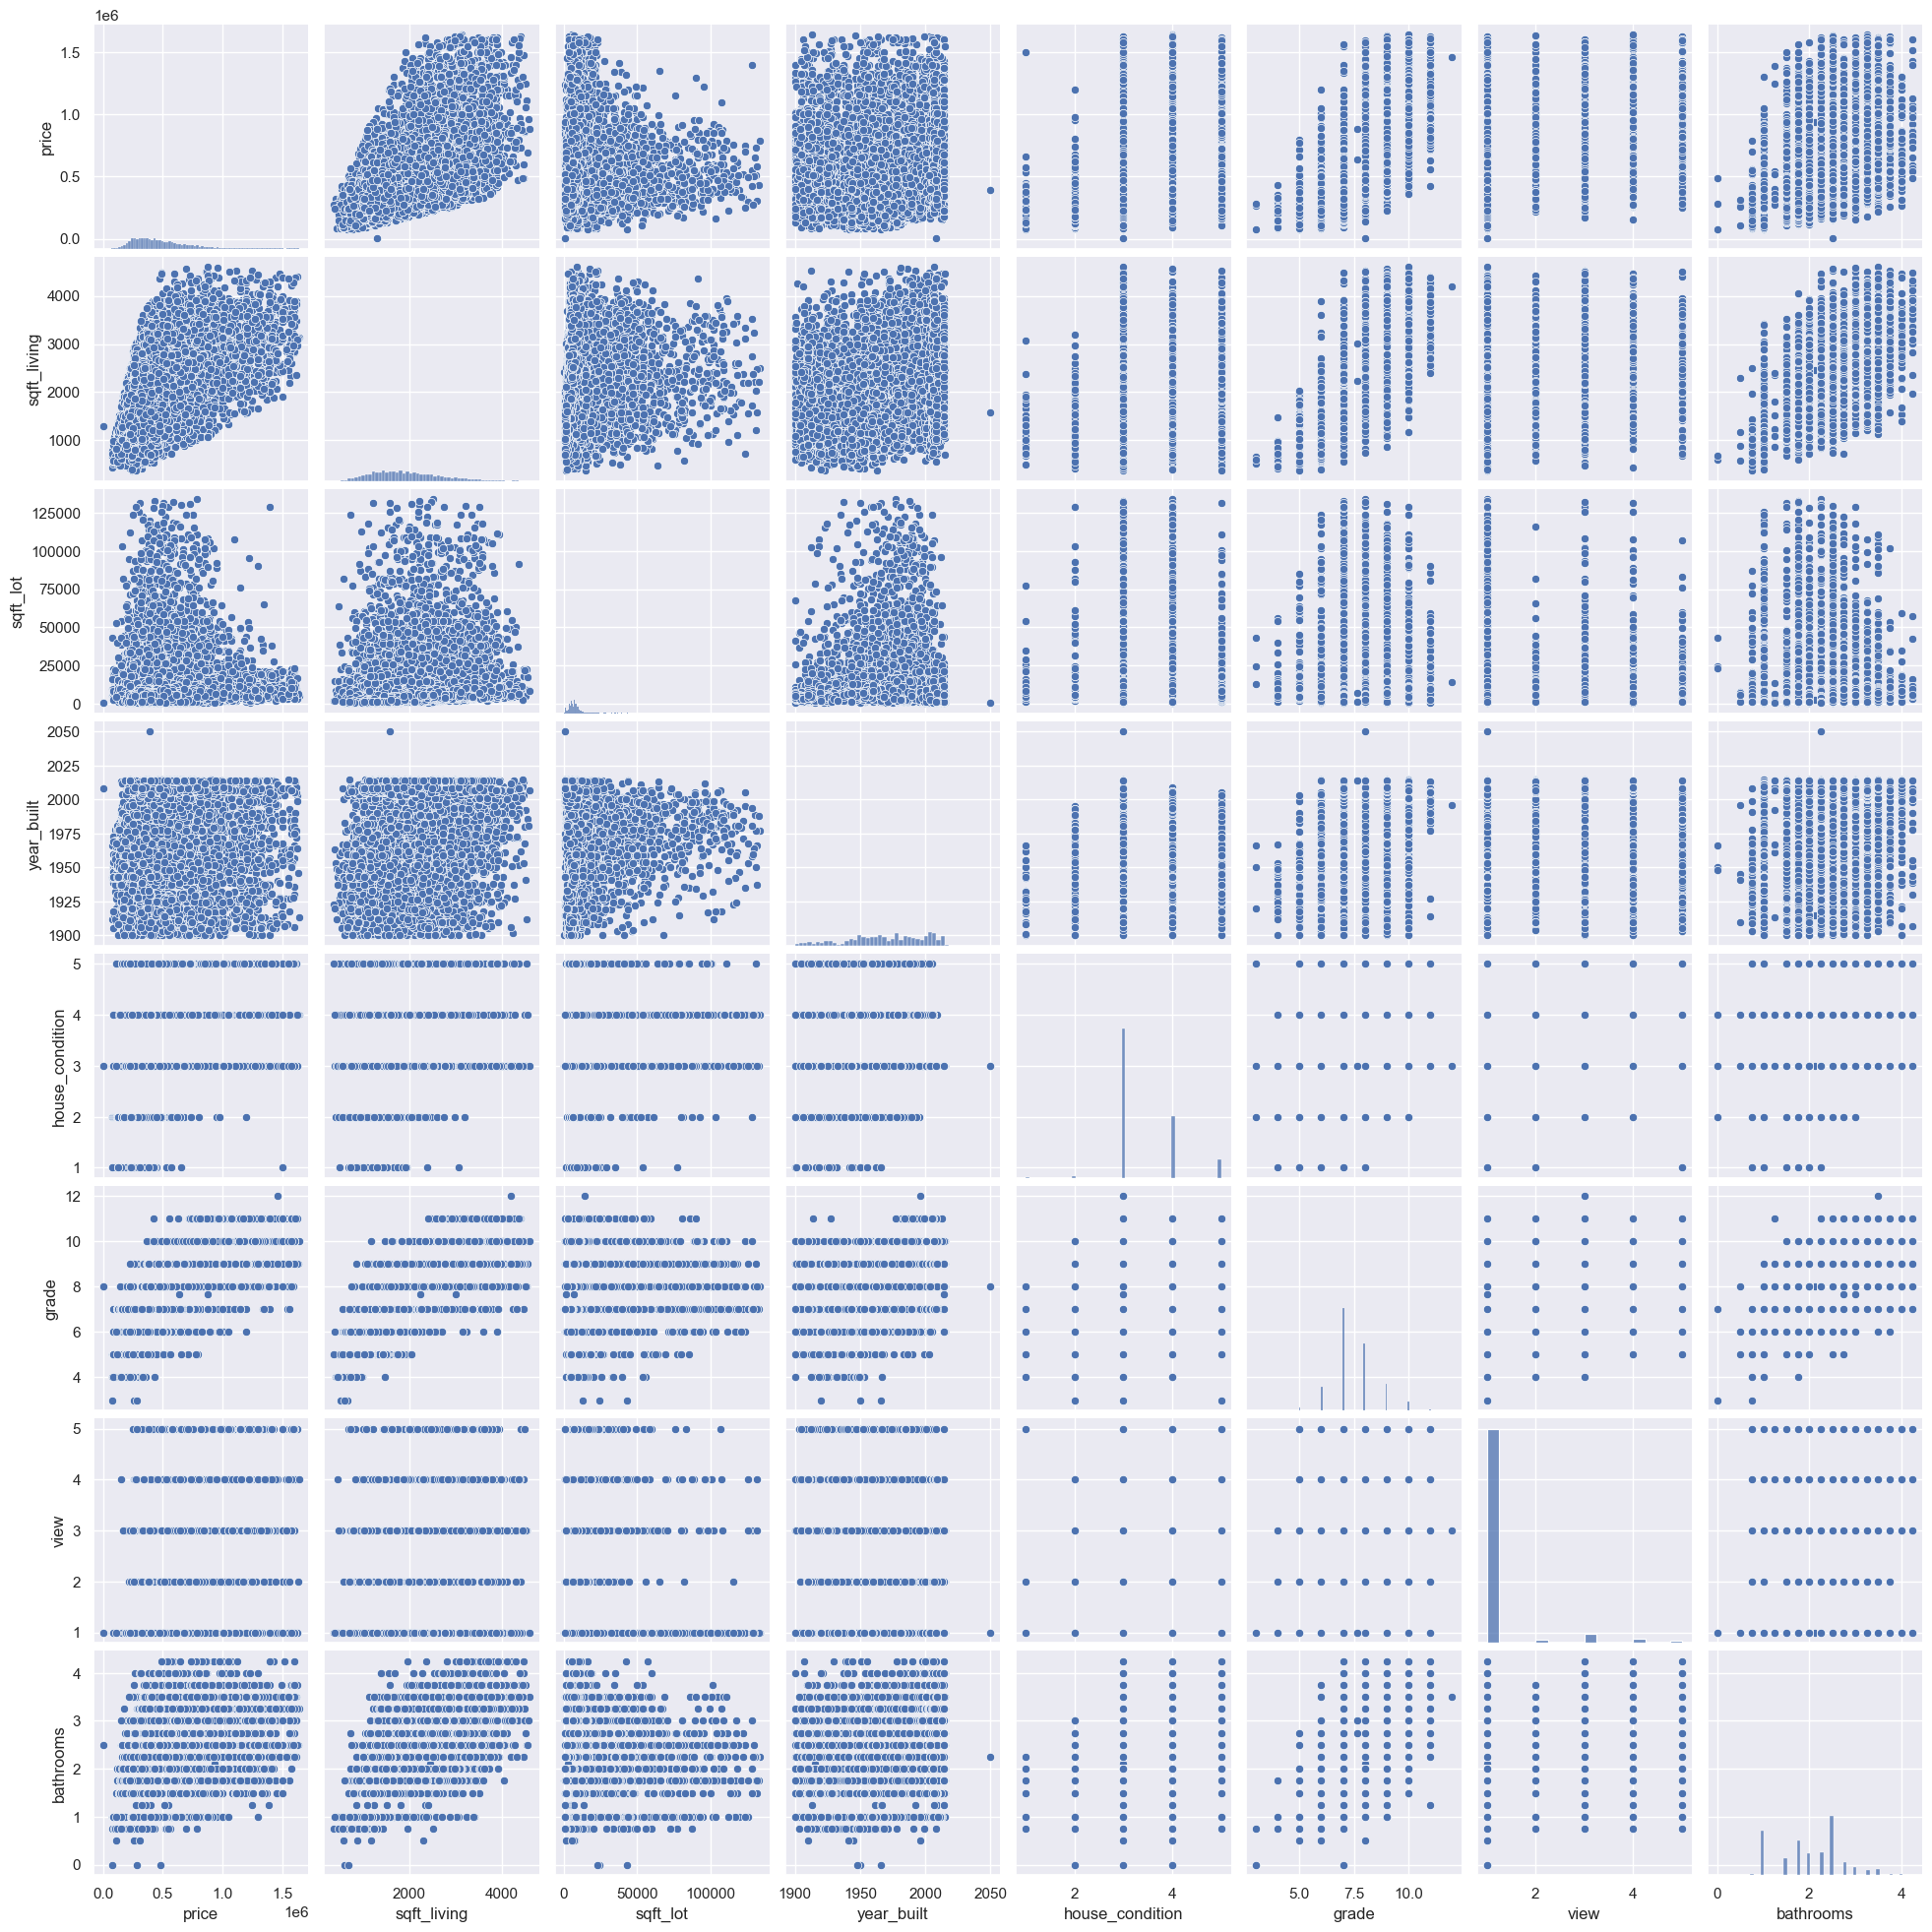

In [21]:
# explore data below (you will need to make new cells)
df = df[['price', 'sqft_living', 'sqft_lot', 'year_built', 'house_condition', 'grade', 'view','bathrooms']].copy()
sns.pairplot(df);

In [22]:
df.describe()

,price,sqft_living,sqft_lot,year_built,house_condition,grade,view,bathrooms
count,2.045600e+04,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000
mean,4.863355e+05,1942.120258,10302.509875,1969.985041,3.411322,7.514241,1.179165,2.032062
std,2.398423e+05,724.345438,12700.282036,29.355600,0.652286,1.026879,0.661116,0.689049
min,3.209000e+03,370.000000,520.000000,1900.000000,1.000000,3.000000,1.000000,0.000000
25%,3.120000e+05,1390.000000,5000.000000,1950.750000,3.000000,7.000000,1.000000,1.500000
50%,4.350000e+05,1840.000000,7412.000000,1972.000000,3.000000,7.000000,1.000000,2.000000
75%,6.020000e+05,2410.000000,10022.250000,1995.000000,4.000000,8.000000,1.000000,2.500000
max,1.640000e+06,4600.000000,133729.000000,2050.000000,5.000000,12.000000,5.000000,4.250000


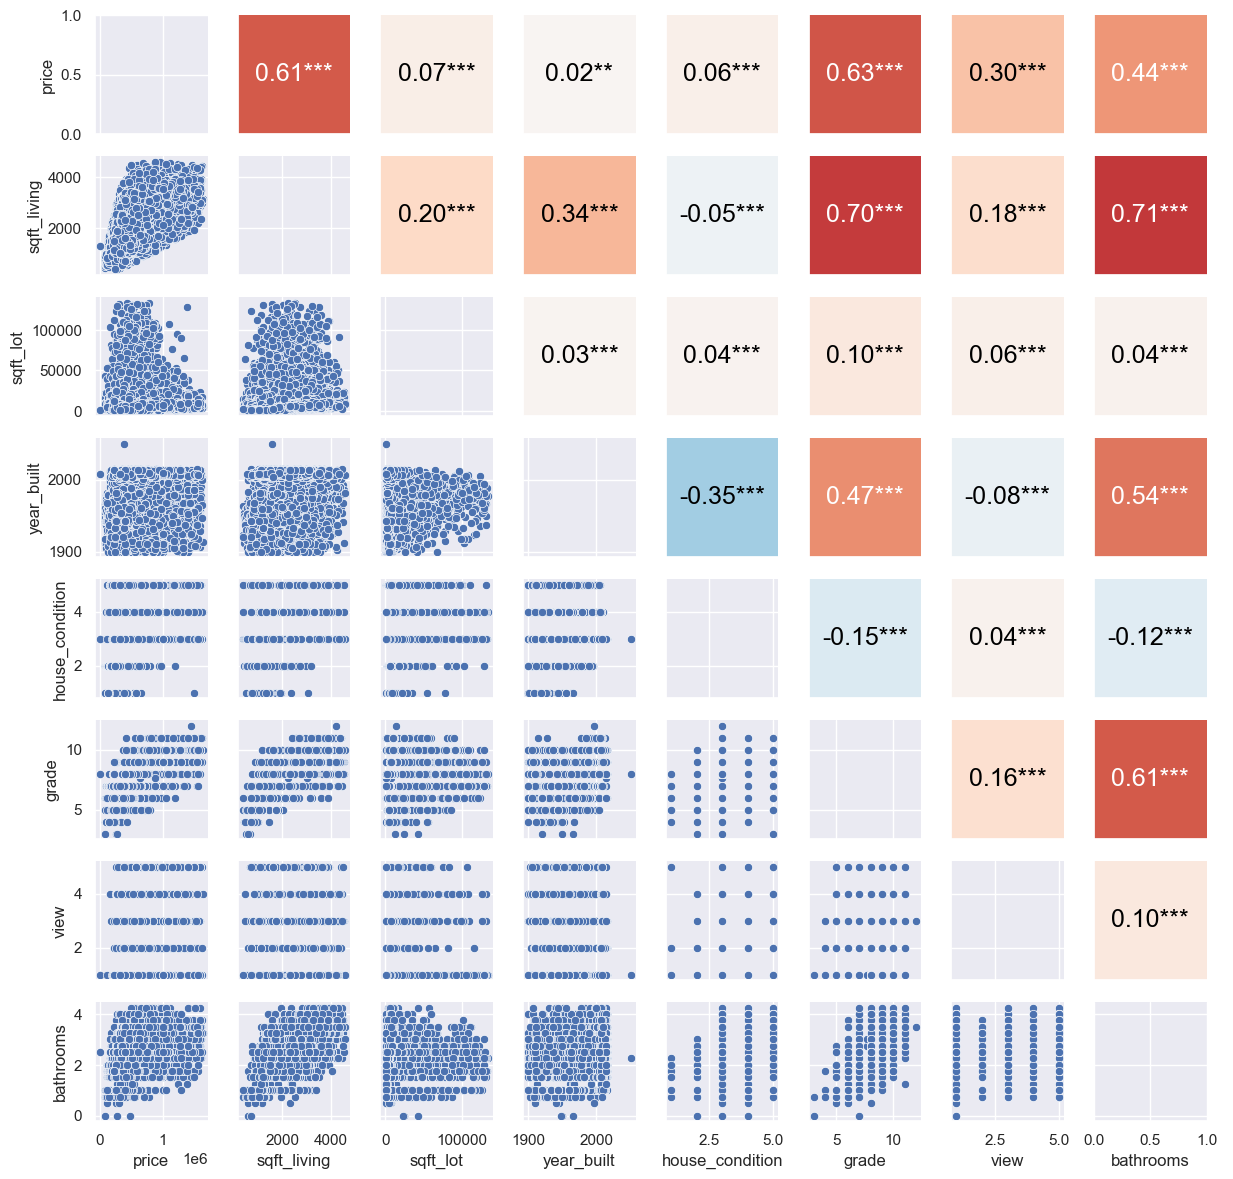

In [24]:
def corrfunc(x, y, **kwargs):
    def pvalue_stars(p):
        if 0.05 >= p > 0.01:
            return '*'
        elif 0.01 >= p > 0.001:
            return '**'
        elif p <= 0.001:
            return '***'
        else:
            return ''
    cmap = kwargs['cmap']
    norm = kwargs['norm']
    ax = plt.gca()
    ax.grid(False)
    r, p = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
    ax.annotate(f"{r:.2f}{pvalue_stars(p)}", xy=(.5, .5), xycoords=ax,
                color='white' if lightness < 0.7 else 'black',
                size=18, ha='center', va='center')
    
g = sns.PairGrid(df, height=1.5, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_upper(corrfunc,
            cmap=plt.get_cmap('RdBu_r'), 
            norm=plt.Normalize(vmin=-1, vmax=1))
g.add_legend()
plt.show()

In [ ]:
# best corr is price and grade/sqft/view

### Step 3: Determine independent and dependent variable

In [42]:
# set X 
x1 = df['sqft_living']
# set Y 
y=df['price']

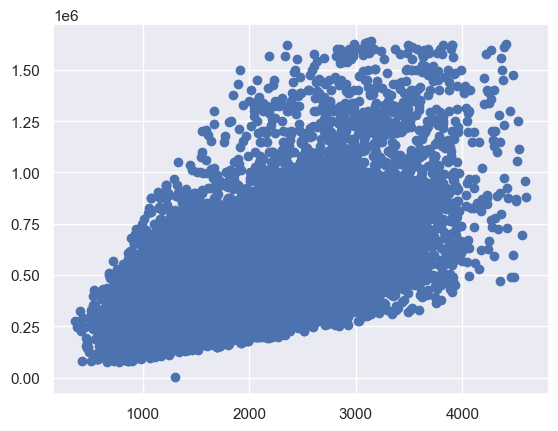

In [43]:
# visualize relationship between X and Y
plt.scatter(x1, y)


### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [44]:
# fit model to X and Y variables (you will need to make more cells)
x = sm.add_constant(x1)

In [45]:
results = sm.OLS(y,x).fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:38:02   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Interpret Model Summary 

In [ ]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared 
.376
- Coefficient of independent variable
202.97
- P-value of T-statistic
110.966
- P-value of F-statistic
1.231e+04

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [ ]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [47]:

new_df = pd.DataFrame({'constant':1, 'sqft_living':[1100, 1500]})
new_df

,constant,sqft_living
0,1,1100
1,1,1500


In [48]:
predictions = results.predict(new_df)
predictions

0    315404.008401
1    396595.022459
dtype: float64

In [49]:

new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,sqft_living,price_predictions
0,1,1100,315404.008401
1,1,1500,396595.022459


# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [50]:
# Pick another independent variable. B d multicollinearity. 
y = df['price']
x1 = df[['sqft_living', 'grade']]

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [51]:
# fit new regression model (you will need to make more cells)
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8419.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:41:24   Log-Likelihood:            -2.7629e+05
No. Observations:               20456   AIC:                         5.526e+05
Df Residuals:                   20453   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.116e+05   1.01e+04    -40.665      0.000   -4.31e+05   -3.92e+05
sqft_living   113.2243      2.407     47.049      0.000     108.507     117.941
grade        9.023e+04   1697.513     53.153      0.000    8.69e+04    9.36e+04
==============================================================================
Omnibus:                     4053.224   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9767.719
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

R-squared: R-squared is 0.452, which measures the proportion of variation in the dependent variable (price) that is explained by the independent variables (sqft_living and grade). A high R-squared value indicates that the model is a good fit for the data and that the independent variables are strong predictors for the dependent variable. In this case, R-squared is 0.452 which means 45.2% of the variation in the dependent variable is explained by the independent variables.

Adjusted R-squared: The adjusted R-squared is 0.451. This is similar to the R-squared value, but takes into account the number of independent variables in the model. It adjusts the R-squared value so that it only increases when the new independent variable significantly improves the model fit.

Coefficient of independent variables: The coefficients of the independent variables are 113.2243 (standard error: 2.407) and 90234 (standard error: 1697.513) respectively. The coefficient represents the change in the dependent variable (price) corresponding to a unit change in the independent variable, while holding all other independent variables constant.

P-value of T-statistic: The t-statistic measures the significance of each independent variable in the model. A low p-value (<0.05) indicates that the independent variable has a significant relationship with the dependent variable. In this case, the p-value for both independent variables is < 0.05, indicating that both sqft_living and grade have a significant relationship with the dependent variable.

P-value of F-statistic: The F-statistic measures the overall significance of the model. A low p-value (<0.05) indicates that the model as a whole is significant and that at least one of the independent variables has a significant relationship with the dependent variable. In this case, the p-value of the F-statistic is 0.00, indicating that the model as a whole is significant.






If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [ ]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [59]:
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1200, 1200, 1200, 1200], 'grade':[6,6,8,8]})
new_df

,constant,sqft_living,grade
0,1,1200,6
1,1,1200,6
2,1,1200,8
3,1,1200,8


In [60]:
new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,sqft_living,grade,price_predictions
0,1,1200,6,265681.760632
1,1,1200,6,265681.760632
2,1,1200,8,446138.800920
3,1,1200,8,446138.800920


In [61]:
y = df['price']
x1 = df[['sqft_living', 'grade', 'view']]

In [62]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     6364.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:13:21   Log-Likelihood:            -2.7569e+05
No. Observations:               20456   AIC:                         5.514e+05
Df Residuals:                   20452   BIC:                         5.514e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.518e+05   9894.481    -45.657      0.000   -4.71e+05   -4.32e+05
sqft_living   105.4301      2.347     44.913      0.000     100.829     110.031
grade        8.735e+04   1650.493     52.923      0.000    8.41e+04    9.06e+04
view         6.528e+04   1856.542     35.162      0.000    6.16e+04    6.89e+04
==============================================================================
Omnibus:                     3666.341   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8679.921
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       5.460   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:

new_df = pd.DataFrame({'constant':1, 'sqft_living':[1200, 1200, 1200, 1200], 'grade':[6,6,8,8], 'view':[0,1,0,1]})
new_df

,constant,sqft_living,grade,view
0,1,1200,6,0
1,1,1200,6,1
2,1,1200,8,0
3,1,1200,8,1


In [64]:

new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,sqft_living,grade,view,price_predictions
0,1,1200,6,0,198851.018479
1,1,1200,6,1,264131.434898
2,1,1200,8,0,373547.513197
3,1,1200,8,1,438827.929616


### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 


# create new markdown cell and write down your observations
First thing off, i can say that the view really contributed to the final price
When i only had price and sqft, the price for a 1100 sqft house was about 311k, while on multi linear regreassion with view and grade included a 1200 sqft houses is 198k 


# Part 4 - Multivariate Time Series Analysis

In [ ]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 